# Customer Churn in Telecom Industry : Basic Data Analysis
What is customer churn? As per Wikipedia definition, customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers. Customer churn rate is a key business metric in any industry and company providing services to end customers, because the cost of retaining an existing customer is far less than acquiring a new one.

In a highly competitive business landscape, the ever increasing rate of customer churn or attrition is a big challenge in front of telecom service providers today. It takes subtantial effort and investment to lure in new customers, while the danger of losing existing customers to competitors is always lurking. Hence, the importance to analyze and understand the reasons of customer's churn had never been felt more. The more the CSPs are able to retain their existing customer base, the better they will perform in the long run.

In this notebook, we will try to analyze the factors which contribute to the possibility of customer's churn. This analysis is performed based on the publicly available dataset from IBM.

![customer-churn.jpg](https://www.livechatinc.com/wp-content/uploads/2016/04/customer-churn.jpg)
Image Credit: https://www.livechatinc.com/wp-content/uploads/2016/04/customer-churn.jpg

### We will follow this simple solution approach for exploratory data analysis:
1. Read data
2. Prepare data for Analysis
    <br>a. Explore data
    <br>b. Pre-process and clean-up data
    <br>c. Analyze data (through visualization)

## Section 1 : Read input data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [2]:
# Read the input training and test data
input_data_path = os.path.join("C:\Study\DataSets\\telco-customer-churn", "WA_Fn-UseC_-Telco-Customer-Churn.csv")
train_data = pd.read_csv(input_data_path)
train_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1957,5619-PTMIK,Female,0,Yes,No,46,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,53.10,2459.8,No
2674,1855-CFULU,Female,1,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,91.45,No
6710,4342-HFXWS,Female,0,Yes,Yes,48,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),69.70,3023.65,No
1425,7077-XJMET,Male,0,Yes,No,12,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,74.15,741.4,No
939,0347-UBKUZ,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,320.45,No


### Section 2 : Prepare data for analysis
* In this section, we will perform:
<br>a. Data exploration : Basic statistical analysis of the data
<br>b. Data exploration : Explore individual features (by looking at data distribution in dataset) and cleanup data as necessary
<br>c. Analyse relationship of the target (Churn) and input features through visualisation
    
So, without further ado, let's get started!

In [3]:
# Total number of records
print("Total number of records in training dataset:", train_data.shape)

Total number of records in training dataset: (7043, 21)


In [4]:
# What are the features available and what are their data type?
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Descriptive statistics of training data
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
# Is there any empty data in training dataset?
train_data.isnull().sum()/train_data.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

#### Observations so far:
1. There are 7043 records in the dataset.
2. There are 21 features in the dataset - "Churn" is the target/dependent variable (this is what we will try to predict), and rest 30 are independent variables which we need to explore further.
3. Only 3 features are numeric - "SeniorCitizen" (categorical), and "tenure" and "MonthlyCharges" (continuous).
4. Datatype of the rest of the features is object, looking at the sample data they look like to be of type string. Some of these features are categorical, which we will map into numerical values.
5. There is absolutely NO missing data. This is amazing!

### Now, let's explore each feature in more detail.

### customerID
Alpha-numeric value representing the ID of each customer. Since this is unique for all 7043 records, we can ignore this feature.

In [7]:
print("Total number of unique customerID values =", len(train_data.customerID.unique()))

Total number of unique customerID values = 7043


### Churn
Did the customer leave the CSP or not?

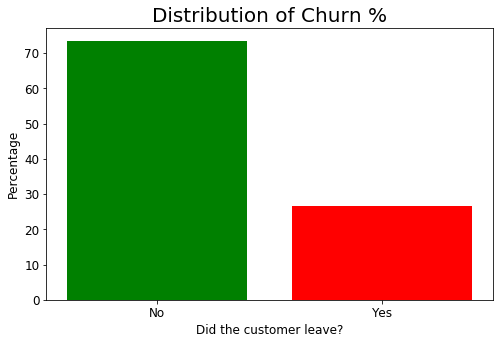

In [8]:
fig, axes = plt.subplots(figsize=(8,5))
data = train_data["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

#### Observations:
* In the dataset provided, close to 30% customers churned, while the rest remained with the service provider.
* In order to make analysis easier in this section, we will add a new column with numerical value of "Churn" right now. Let's call the column as ChurnVal, such that - Yes = 1 and No = 0.

In [9]:
# Create column ChurnVal with - Yes = 1 and No = 0
churn_mapping = {"No": 0, "Yes": 1}
train_data['ChurnVal'] = train_data['Churn'].map(churn_mapping)

### Gender
What is the gender distribution and how is gender related to churn?

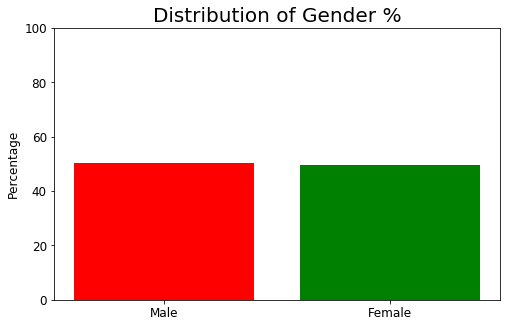

In [10]:
fig, axes1 = plt.subplots(figsize=(8,5))

# Plot distribution of gender data
data = train_data["gender"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Gender %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

plt.show()

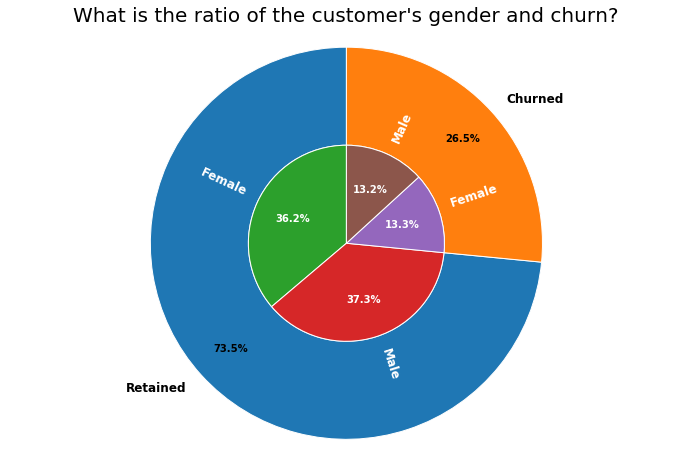

In [11]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = train_data.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = train_data.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

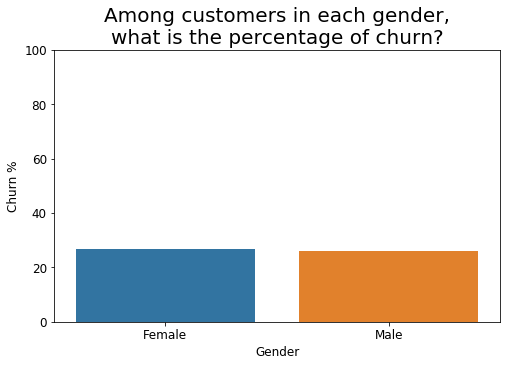

In [12]:
fig, axes3 = plt.subplots(figsize=(8,5))

# Chances of churn based on gender
sns.barplot(x="gender", y=train_data["ChurnVal"]*100, data=train_data, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each gender, what is the percentage of churn?', 35)))
axes3.set_ylim(0,100)
plt.show()

#### Observations:
* The dataset has almost equal distribution of male and female customers.
* Both in the churned or retained category - percentage of males and females are almost equally distributed.
* Out of all male customers, approx 26% churned. While among females, the churn percentage is approx 27%. Both are almost at equal level.
* It can be concluded that probability of churn does not depend on gender of the customer. 

#### SeniorCitizen
Flag indicating is the customer is senior citizen or not.

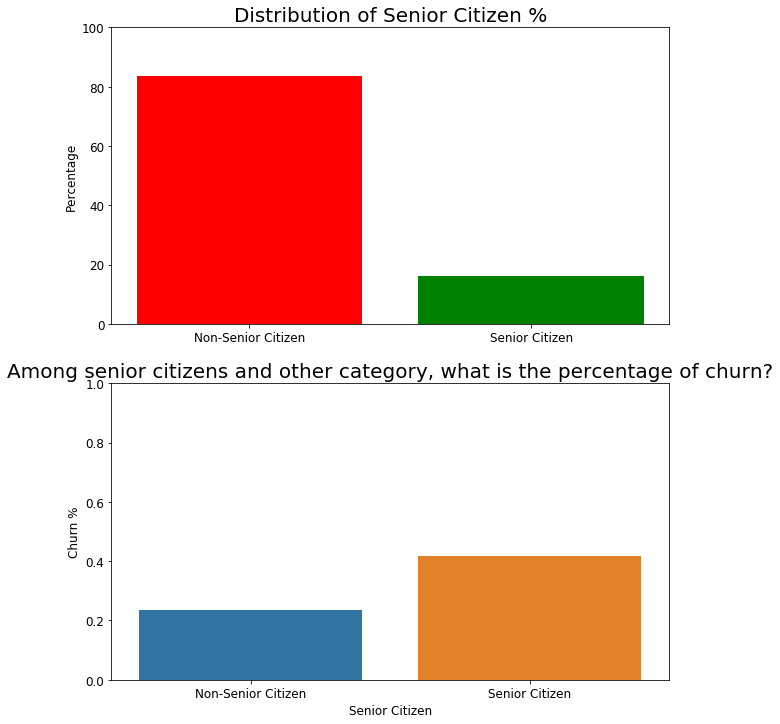

In [13]:
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(10,12))

# Plot distribution of SeniorCitizen data
data = train_data["SeniorCitizen"].value_counts(normalize=True).sort_index()
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Senior Citizen %')
axes1.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes1.set_ylim(0,100)

# Chances of churn based on gender
sns.barplot(x="SeniorCitizen", y="ChurnVal", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Senior Citizen')
axes2.set_ylabel('Churn %')
axes2.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes2.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes2.set_ylim(0,1)

plt.show()

#### Observations:
* Majority of the customers in dataset are Non-Senior Citizens (> 80%).
* Out of all senior citizen customers, more than 40% churned. While among younder customers, the churn percentage is less than 25%.
* Hence, senior citizens tend to churn more than younger customers.
* Thus, SeniorCitizen and Churn features seem to be related. 

### Partner
Does the customer have a partner?

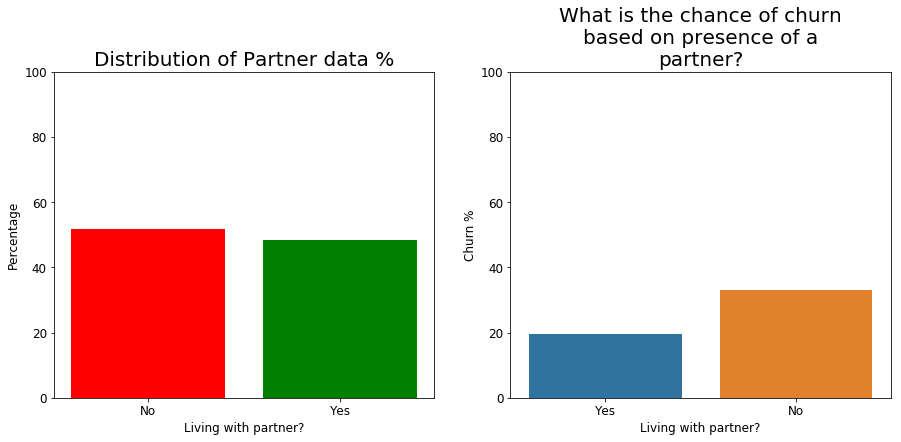

In [14]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = train_data["Partner"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Partner data %')
axes1.set_xlabel('Living with partner?')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Partner", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Living with partner?')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of a partner?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* The dataset contains almost equal distribution of customer data - either living alone or with partner.
* Customers living alone tend to churn more (~35% vs ~20%).

### Dependents
Does the customer have dependents?

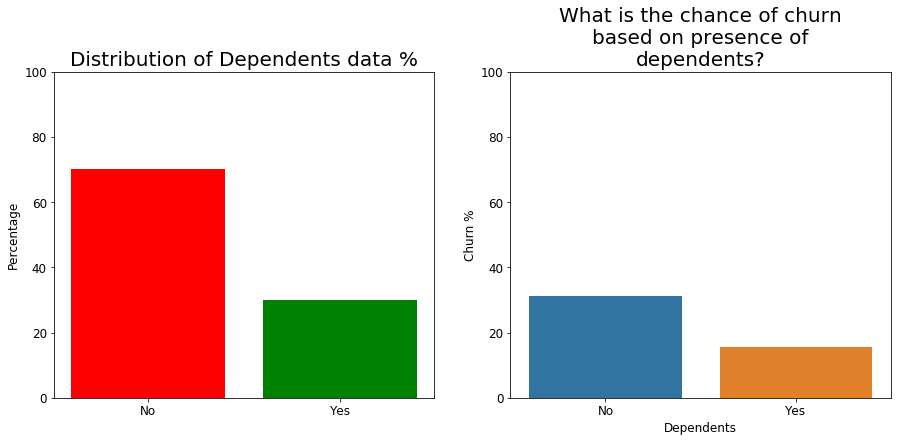

In [15]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = train_data["Dependents"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Dependents data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Dependents", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of dependents?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* The dataset contains almost 70% customers who does not have a dependent, while 30% has one or more dependents.
* Customers without depedents tend to churn more (~30% vs ~20%).
* From Partner and Dependents data we can conclude that - customers who are single/independent, i.e. without partners or dependents tend to leave the CSP more, while customers with partner and/or dependents, usually continue with the same CSP.

### Tenure
For how long have the customer been with this CSP

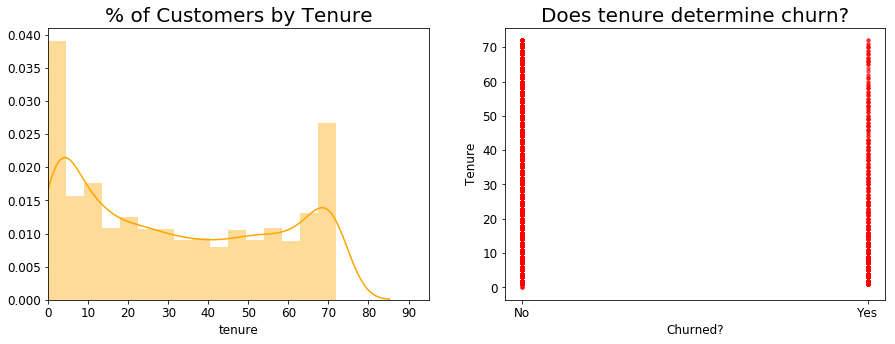

In [16]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

# Plot tenure occurance
sns.distplot(train_data.tenure, color='orange', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(train_data.Churn, train_data.tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Does tenure determine churn?')

plt.show()

#### Observations:
* Majority of the customers in the dataset are rather short-lived (less than a year). So, either people churn within a year, or these are newly acquired customers. We'll find out soon.
* Interestingly, there's a spike of number in number for customers who've been with the CSP for more than 5 years.
* From the other diagram as well we observe that the churn rate is bit thinner for very long tenure customers.
* Next, we will categorize the tenure data into years and find correlation with churn rate.

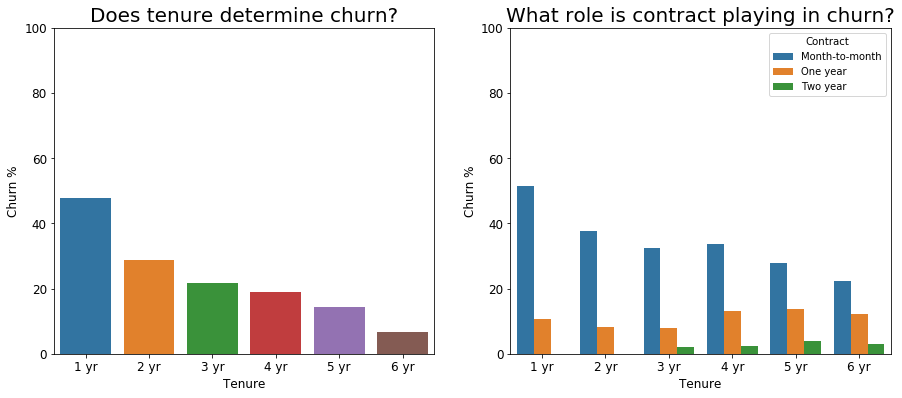

In [17]:
# Divide the ages into bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
train_data['tenureGroup'] = pd.cut(train_data["tenure"], bins, labels=labels)

# Draw a bar plot of tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

# Draw a bar plot of Age vs. survival
sns.barplot(x="tenureGroup", y=train_data.ChurnVal*100, hue="Contract", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is contract playing in churn?')


plt.show()

#### Observations:
* We divided the customer tenure into categories as - 1 year, 2 years to 6 years. It is apparent that newly acquired customers tend to churn more (~almost 50% of customers who have subscribed within last 1 years have left).
* As customer tenure increases, the chance of churn decreases accordingly.
* <b>Hence, the CSP should concentrate on retaining newly acquired customers. If they can somehow hold the customers for more couple of years, the possibility of those customers continuing with the same CSP increases multifold. </b>
* In addition, CSP should try to get customers on contract for longer duration instead of selling monthly plans. This is another important factor for churn determination.

### Contract

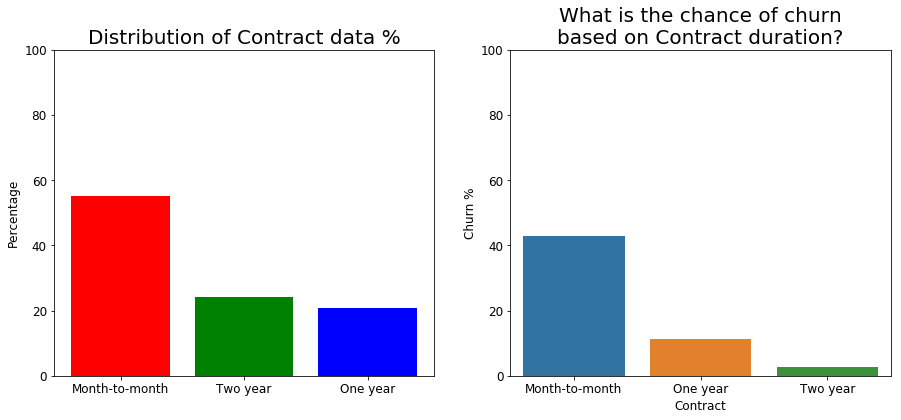

In [18]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
data = train_data["Contract"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Contract data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="Contract", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Contract duration?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* ~55% customer are on month-to-month (or monthly) plans, while little more than 20% each are on 1 or 2 years contract.
* <b>The churn rate is high among monthly customers and least among 2-year contracted customers. While this is expected because of the contract duration, this is an alarming signal for CSP since should try to retain contracted customers and bring the churn rate to near zero, in addition to spending effort on month-to-month customers.</b>

### Different Service Types
#### PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport and StreamingTV, StreamingMovies

These are the different types of services offered by CSP to customers. Here we are plotting 2 diagrams for each service type - 
* on left - we show the distribution of data in the dataset 
* on right - we look at the percentage of churn in each category of service types

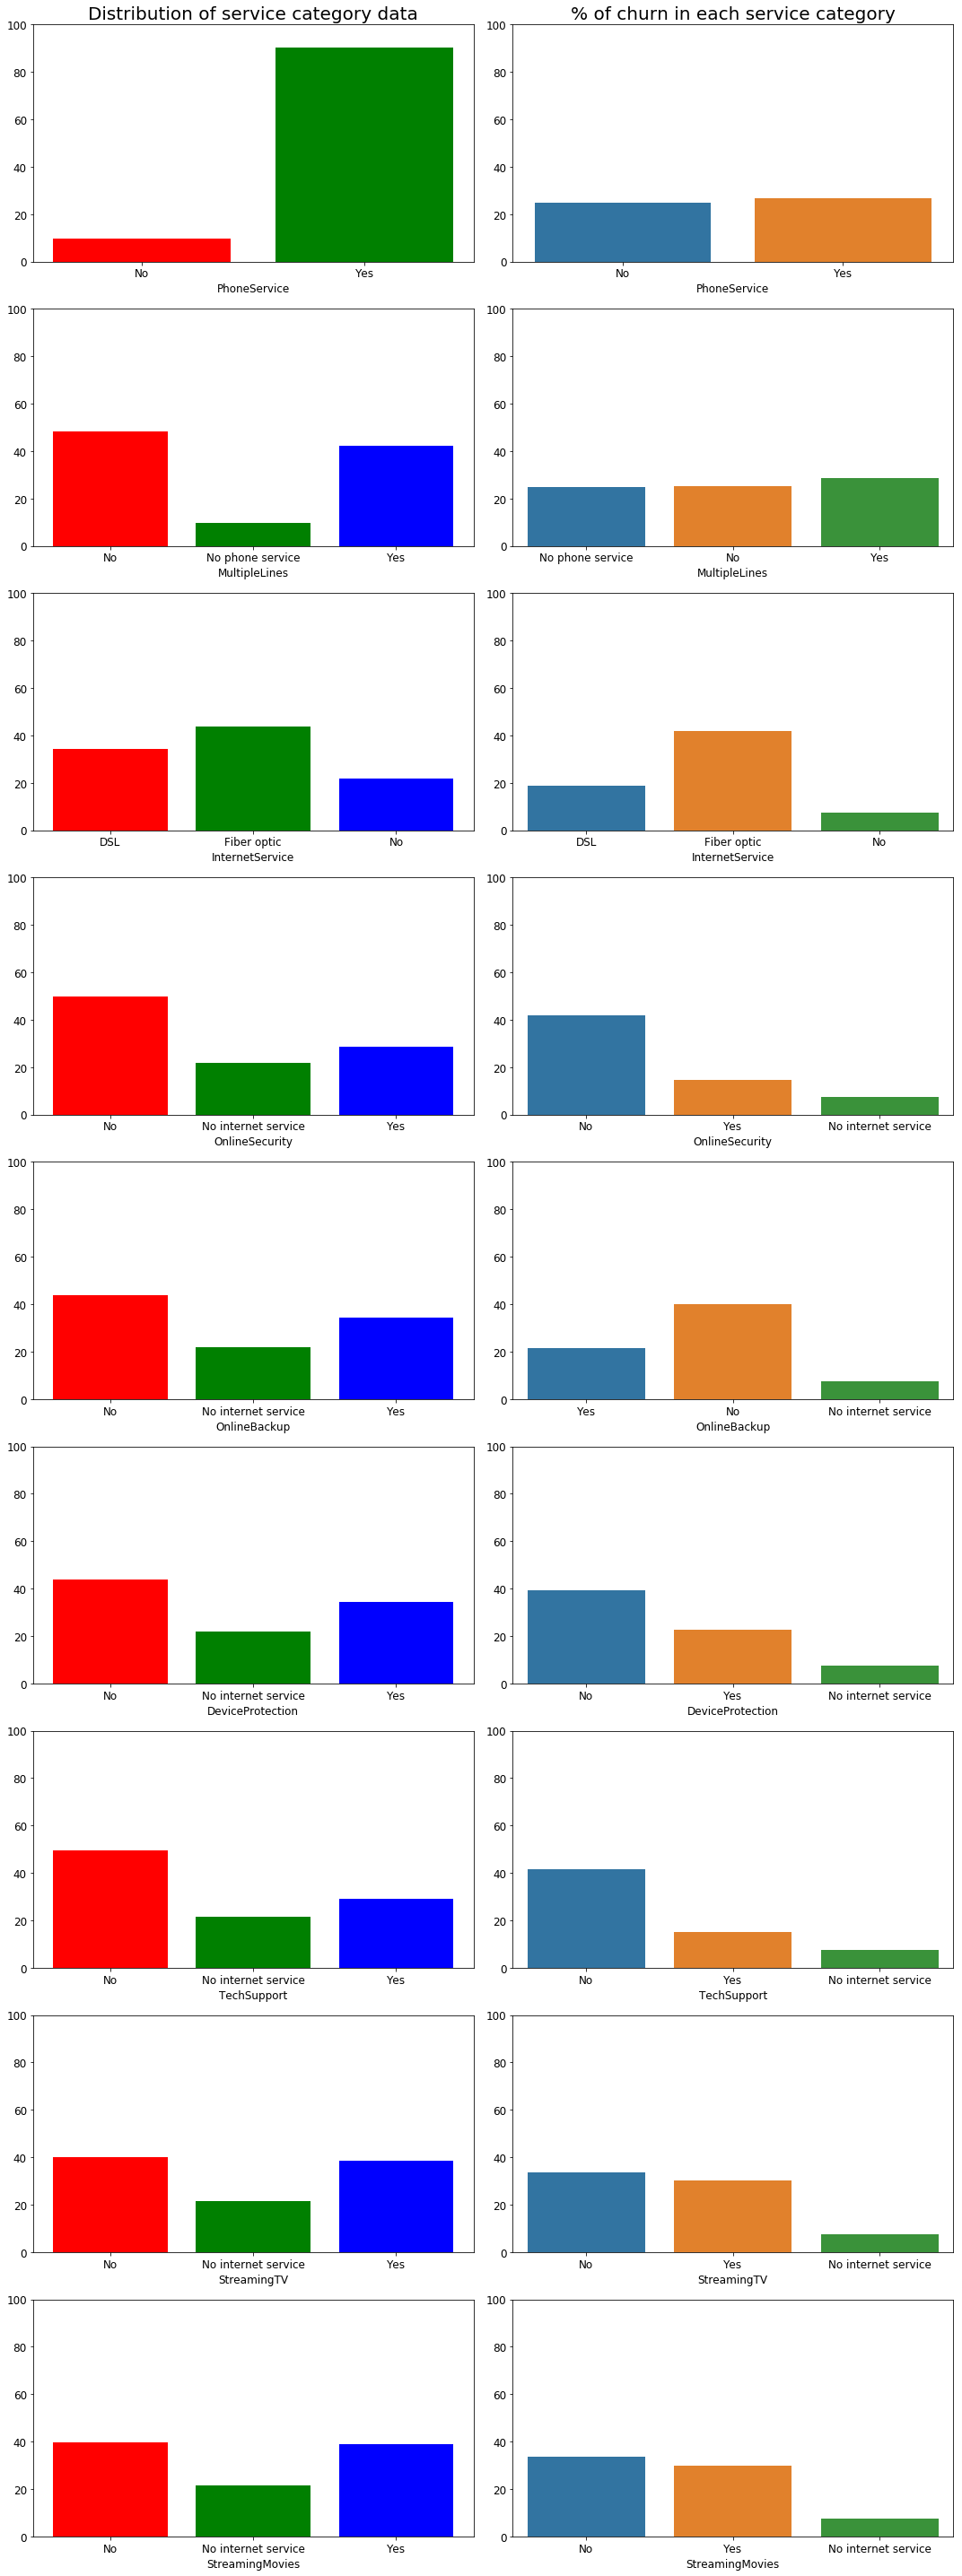

In [19]:
Services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 2
n_rows = len(Services)
fig = plt.figure(figsize=(15,40))
#fig.suptitle('Distribution of Service Types and relation with Churn')
idx = 0

for serviceType in enumerate(Services):
    # Fetch data of Service Type
    data = train_data[serviceType[1]].value_counts(normalize=True).sort_index()

    # Now, plot the data
    i = 0
    for i in range(n_cols):
        idx+=1
        axes = fig.add_subplot(n_rows, n_cols, idx)

        # On column 1 - Plot the data distribution on bar plot
        if idx%2 != 0:
            axes.bar(data.index, data*100, color=my_colors)
        # On column 2 - Plot the percentage of churns on each service type
        else:
            sns.barplot(x=serviceType[1], y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes)

        if idx == 1 : axes.set_title('Distribution of service category data')
        if idx == 2 : axes.set_title('% of churn in each service category')
            
        axes.set_xlabel(serviceType[1])
        axes.set_ylabel('')
        axes.set_ylim(0,100)

fig.tight_layout()
plt.show()

#### Observations:
* Phone Service - Almost all (90%) customers have Phone Service. However, the churn rate is very low compared to the volume (~25%). On the other hand, churn rate is almost same (~25%) among non-phone service customers as well (though they form only 10% of the population). Thus, selling Phone Service is more beneficial for the CSP.
* Multiple Lines - Among Phone Service users, 45% has Multiple Lines while the rest 45% have single line. Churn rate is slightly higher among users with multiple lines, but not that significant (~28%).
* Internet Service - Approx 20% customers do not use internet. Among customers using internet, approx 45% use Fiber Optic and 35% use DSL. However, churn among Fiber Optic users is pretty high as well (> 40%), while it is 20% among DSL users. Hence, CSP needs to look into the quality of its internet service.
* Online Security - ~50% customers do not use online security service, and churn rate among such users is highest as well (~40%).
* Online Backup, Device Protection and Tech Support - Same as above, most of the customers do not use this service and they tend to churn as well.
* Streaming TV and Streaming Movies - Among users with internet services (which is mandatory for availing these services), almost half use these streaming services. The rate of churn is more or less same as well (~35%) irrespective of usage of streaming services.

### Paperless Billing
How does the customer expect his bill to be delivered? Through digital channels or by post?

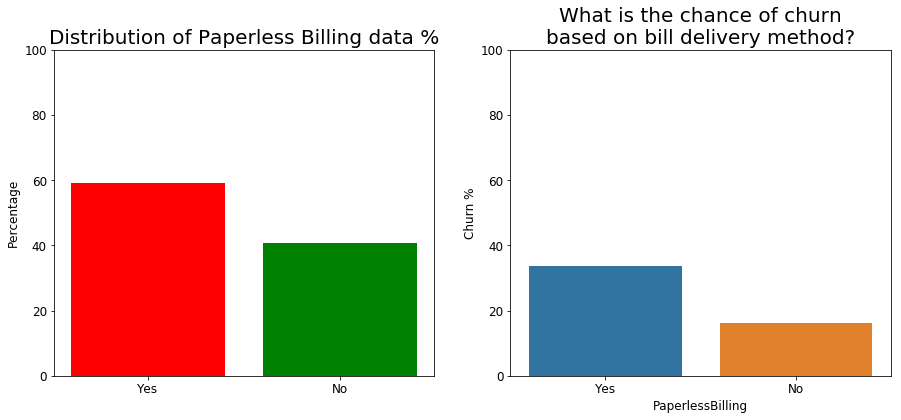

In [20]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
data = train_data["PaperlessBilling"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Paperless Billing data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="PaperlessBilling", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on bill delivery method?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* Almost 60% customers prefer paper-less billing.
* Almost 35% of them left the CSP.
* Now, apparently a direct relation between bill mode and churn cannot be established, it must be investigated if customers receiving soft copies of bills are getting clear and transparent information on all the charges, and proper service and care if they face any difficutly in interpreting the bills.

### Payment Method
How does the customer make payments?

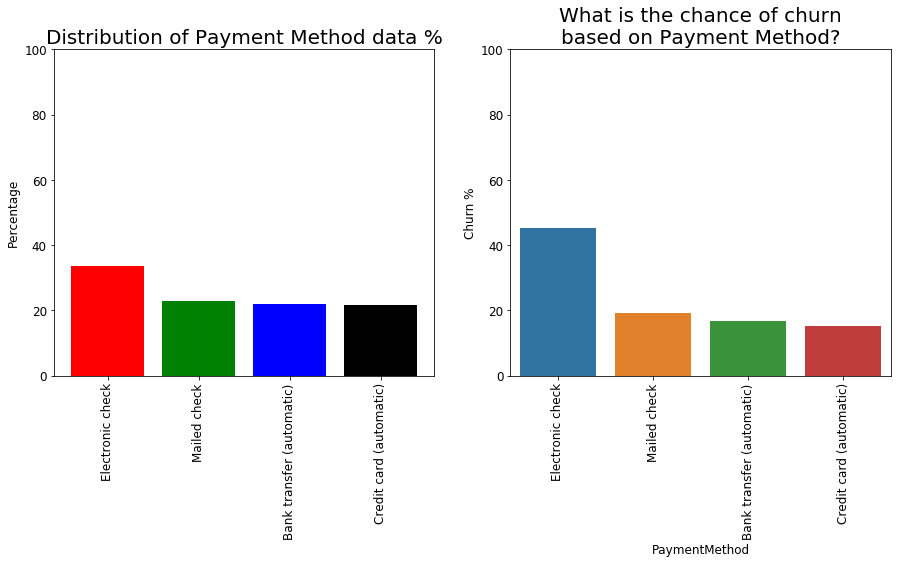

In [21]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
data = train_data["PaymentMethod"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Payment Method data %')
axes1.set_ylabel('Percentage')
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="PaymentMethod", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title("\n".join(wrap('What is the chance of churn based on Payment Method?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* Customers with payment method as "Electronic Check" is slightly higher than customers with other modes of payment (~35%).
* Churn among such customers is highest as well (~45%).
* CSP should try to encourage customers to use automated mode of payments.

### Monthly Charges

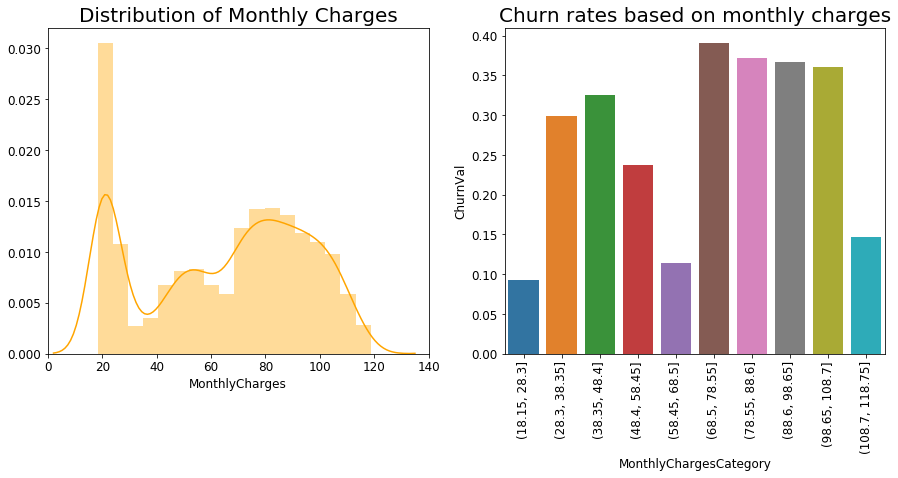

In [22]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot MonthlyCharges occurance
sns.distplot(train_data.MonthlyCharges, color='orange', ax=axes1)
axes1.set_title('Distribution of Monthly Charges')
axes1.set_xlim(0,140)

# Categorize MonthlyCharges into bins and plot
train_data['MonthlyChargesCategory'] = pd.cut(train_data["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='ChurnVal', data=train_data, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on monthly charges')

plt.show()

#### Observations:
* A huge number of customers use very cheap plans (between USD 18 to USD 30). Interstingly, churn rate among them is least as well.
* The observed churn rate is very high among high spender customers, typically between USD 70 to USD 100 per month.

### TotalCharges
TotalCharges is the total charge of customer over a period of time, hence the value is supposed to be numeric (float), but the dtypes is returning Object, which means there are few str data in this column. Upon further analysis it is found that there are 11 rows whose TotalCharges is stored as " ". Hence, data cleanup is necessary in this case, and we have 2 options:
1. Drop the rows whose TotalCharges == " ", and
2. Try to fill in the missing TotalCharges values

Let's try #2 first. Total Charges might be equal to Monthly Charges times the tenure of the customer. To validate this assumption, we will plot KDE of (tenure) and (TotalCharges/MonthlyCharges) and look at the deviation. It the plots overlap, then we will compute missing TotalCharges as = (MonthlyCharges * tenure).

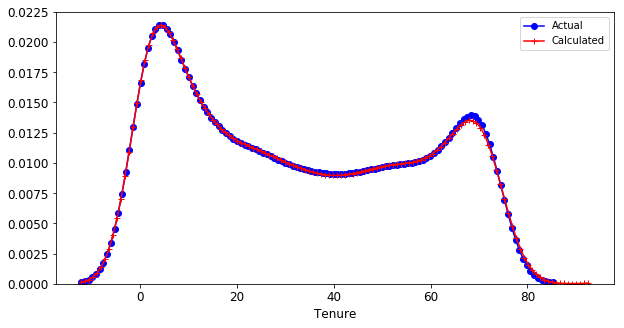

In [23]:
# Before plotting, we will temporarily drop missing values 
# and convert the column into float 
tmp_df = train_data[~train_data.TotalCharges.str.contains(" ")]
tmp_df['TotalCharges'] = pd.to_numeric(tmp_df['TotalCharges'])

# Now perform the calculations as described above, and plot
tenure_calc = tmp_df.TotalCharges/tmp_df.MonthlyCharges
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(tmp_df.tenure, marker='o', c='b', label="Actual", ax=axes)
sns.kdeplot(tenure_calc, marker='+', c='r', label="Calculated", ax=axes)
axes.set_xlabel('Tenure')
axes.legend()
plt.show()

#### Observations:
* From the above graph, we can infer that TotalCharges is approximately equal to (MonthlyCharges * tenure).
* Hence, we will fill up missing TotalCharges accordingly.

In [24]:
train_data['TotalCharges'] = train_data['TotalCharges'].replace(" ", (train_data.MonthlyCharges * train_data.tenure))
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'])

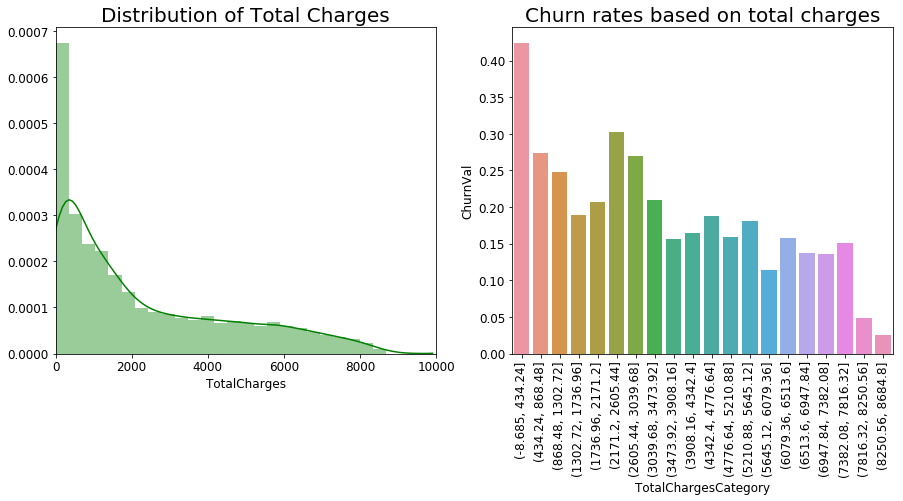

In [25]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot TotalCharges occurance
sns.distplot(train_data.TotalCharges, color='green', ax=axes1)
axes1.set_title('Distribution of Total Charges')
axes1.set_xlim(0,10000)

# Categorize TotalCharges into bins and plot
train_data['TotalChargesCategory'] = pd.cut(train_data["TotalCharges"], bins=20)
sns.barplot(x='TotalChargesCategory', y='ChurnVal', data=train_data, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on total charges')

plt.show()

#### Observations:
* As expected, majority of customers have lower total charges.
* Highest churn rate is observed among such customers.

### Correlation
Here, we'll see the correlation between customer's tenure, monthly charges and total charges

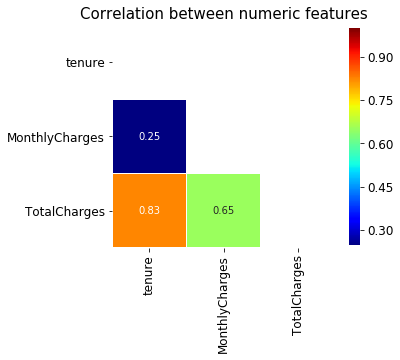

In [26]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = train_data[features].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

fig, axes = plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix, linewidths=0.25, vmax=1.0, square=True, cmap=plt.get_cmap('jet'),
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": 0.8}, ax=axes)
axes.set_title('Correlation between numeric features', fontsize=15)
plt.show()

#### Observations:
* Again, as expected, strong correlation exists between tenure and total charges, which means that as tenure increases so does total charges.
* Strong correlatation exists between monthly charges and total charges as well.

### Key Highlights:
Based on the observations made so far, the key takeaways or highlights are:
* Tenure and Contract duration seems to be strong factors in determining churn.
* Among service types, phone service seems to be most popular.
* CSP should investigate if customers receiving digital invoice have any concern with understanding the bill details.
* Also, they should encourage customers to move to automated payment modes to improve customer experience.
* Gender does not play an important role. However, CSPs should take care of the experience of senior citizens.
